In [1]:
import sys
sys.path.append("../../erlking/")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble.forest import _generate_sample_indices
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
import sklearn.cross_validation as xval
from erlking import random_forest_error, calc_inbag
sns.set()
%matplotlib inline

In [3]:
mpg_names = ["mpg","cyl","disp","hp","weight","accel","year","origin","name"]

In [4]:
mpg_df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data", names=mpg_names, sep="\s+")

In [5]:
mpg_df["hp"] = pd.to_numeric(mpg_df["hp"], errors="coerce")
mpg_df = mpg_df.dropna()

In [6]:
mpg_df.shape

(392, 9)

In [7]:
mpg_y = mpg_df["mpg"].as_matrix()
mpg_X = mpg_df.drop(["mpg", "name"], axis=1).as_matrix()

In [8]:
mpg_X.shape

(392, 7)

In [9]:
mpg_X

array([[   8. ,  307. ,  130. , ...,   12. ,   70. ,    1. ],
       [   8. ,  350. ,  165. , ...,   11.5,   70. ,    1. ],
       [   8. ,  318. ,  150. , ...,   11. ,   70. ,    1. ],
       ..., 
       [   4. ,  135. ,   84. , ...,   11.6,   82. ,    1. ],
       [   4. ,  120. ,   79. , ...,   18.6,   82. ,    1. ],
       [   4. ,  119. ,   82. , ...,   19.4,   82. ,    1. ]])

(array([  27.,   95.,  120.,   44.,   19.,   47.,   13.,   14.,    5.,    8.]),
 array([  46. ,   64.4,   82.8,  101.2,  119.6,  138. ,  156.4,  174.8,
         193.2,  211.6,  230. ]),
 <a list of 10 Patch objects>)

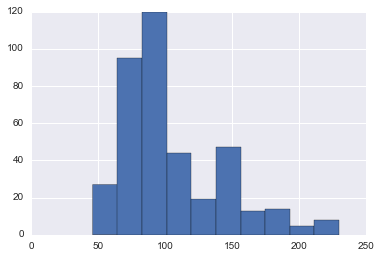

In [10]:
plt.hist(mpg_X[:, 2])

In [11]:
mpg_X_train, mpg_X_test, mpg_y_train, mpg_y_test = xval.train_test_split(mpg_X, mpg_y, test_size=0.25, random_state=42)

In [12]:
n_trees = 2000

In [13]:
mpg_forest = RandomForestRegressor(n_estimators=n_trees)

In [14]:
mpg_forest.fit(mpg_X_train, mpg_y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=2000, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [15]:
mpg_inbag = calc_inbag(mpg_X_train.shape[0], mpg_forest)

In [16]:
mpg_V_IJ_unbiased = random_forest_error(mpg_forest, mpg_inbag, mpg_X_train, mpg_X_test)

In [17]:
mpg_y_hat = mpg_forest.predict(mpg_X_test)

In [18]:
mpg_X_test.shape

(98, 7)

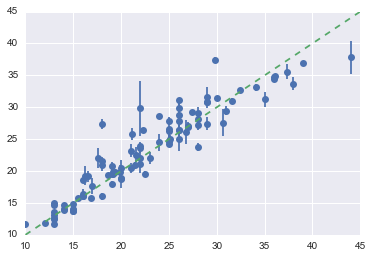

In [19]:
plt.errorbar(mpg_y_test, mpg_y_hat, yerr=np.sqrt(mpg_V_IJ_unbiased), fmt='o')
plt.plot([10, 45], [10, 45], '--')

(array([ 38.,  49.,   7.,   1.,   2.,   0.,   0.,   0.,   0.,   1.]),
 array([ -1.780364  ,   0.21140319,   2.20317038,   4.19493756,
          6.18670475,   8.17847194,  10.17023913,  12.16200632,
         14.1537735 ,  16.14554069,  18.13730788]),
 <a list of 10 Patch objects>)

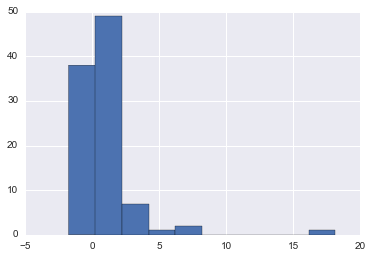

In [20]:
plt.hist(mpg_V_IJ_unbiased)

In [21]:
b = np.arange(10).reshape(10, 1)
c = np.arange(20).reshape((1, 20))

In [22]:
spam_names = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names', skiprows=30)

In [23]:
spam_names = spam_names['1']
spam_names =  [n.split(':')[0] for n in spam_names] + ['spam']
spam_df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data", names=spam_names)

In [24]:
spam_df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [25]:
spam_y = spam_df["spam"].as_matrix()
spam_df["spam"].as_matrix()
spam_X = spam_df.drop(["spam"], axis=1).as_matrix()
spam_X.shape

(4601, 57)

In [26]:
spam_X_train, spam_X_test, spam_y_train, spam_y_test = xval.train_test_split(spam_X, spam_y, test_size=0.2)

In [27]:
spam_RFC = RandomForestClassifier(max_features=5, n_estimators=n_trees)

In [28]:
spam_RFC.fit(spam_X_train, spam_y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=5, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [29]:
spam_inbag = calc_inbag(spam_X_train.shape[0], spam_RFC)

In [30]:
spam_V_IJ_unbiased = random_forest_error(spam_RFC, spam_inbag, spam_X_train, spam_X_test)

In [31]:
spam_y_hat = spam_RFC.predict_proba(spam_X_test)

In [32]:
spam_y_hat.shape

(921, 2)

In [33]:
spam_y_test.shape

(921,)

<Container object of 3 artists>

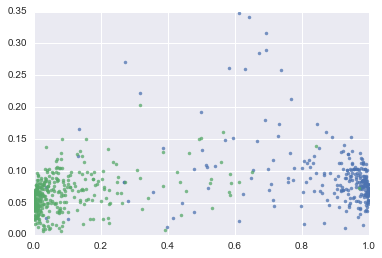

In [34]:
idx = np.where(spam_y_test==1)[0]
plt.errorbar(spam_y_hat[idx, 1], np.sqrt(spam_V_IJ_unbiased[idx]), fmt='.', alpha=0.75)

idx = np.where(spam_y_test==0)[0]
plt.errorbar(spam_y_hat[idx, 1], np.sqrt(spam_V_IJ_unbiased[idx]), fmt='.', alpha=0.75)
